# Auswertung der Straftaten in Los Angeles von 2020-01 bis 2024-06
## Seminararbeit Wahlfach Datenanlyse in der Praxis
Benjamin Stöver

Los Angeles, als eine der bevölkerungsreichsten Städte der USA, steht immer wieder im Fokus, wenn es um Kriminalität und öffentliche Sicherheit geht. Die Stadt vereint zahlreiche kulturelle, soziale und wirtschaftliche Gegensätze, was auch Einfluss auf die Verteilung und Art der Straftaten hat. Um diese Zusammenhänge besser verstehen zu können, sind Datenanalysen ein entscheidendes Instrument, um Verbrechensmuster zu erkennen und gezielte Maßnahmen zur Prävention und Bekämpfung zu entwickeln.

Diese Seminararbeite basiert auf dem Datensatz (LA_Crime_Data_from_2020_to_Present.csv), welcher auf der Internetseite kaggle unter folgendem Link zu finden ist "https://www.kaggle.com/datasets/haseefalam/crime-dataset". Er enthält detaillierte Informationen wie das Datum und die Uhrzeit der Vorfälle, die Kategorien der Straftaten und deren geografische Lage.

# Import der wichtigsten Python Bibliotheken
Für die Analyse und Visualisierung der Daten wurden **Pandas** zur Datenverarbeitung sowie **Matplotlib** und **Seaborn** zur Erstellung aussagekräftiger Diagramme verwendet. Diese Bibliotheken ermöglichen eine effiziente Auswertung und ansprechende Darstellung der Ergebnisse.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV einlesen und DataFrame erstellen

In [80]:
# Quelle Dataset
# https://www.kaggle.com/datasets/haseefalam/crime-dataset
df = pd.read_csv("LA_Crime_Data_from_2020_to_Present.csv")
#df.info()
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


Der Datensatz enthält insgesamt 955339 Zeilen und 28 Spalten.

# Bedeutung der Spalten im Datensatz

| **Spaltenname**     | **Beschreibung**                                                                 |
|----------------------|---------------------------------------------------------------------------------|
| **DR_NO**           | Eindeutige Fallnummer der Polizei.                                              |
| **Date Rptd**       | Datum, an dem der Vorfall gemeldet wurde.                                       |
| **DATE OCC**        | Datum, an dem der Vorfall tatsächlich stattgefunden hat.                        |
| **TIME OCC**        | Uhrzeit des Vorfalls.                                                          |
| **AREA**            | Code des geografischen Gebiets (Police Division) innerhalb von Los Angeles.     |
| **AREA NAME**       | Name der Police Division.                                                      |
| **Rpt Dist No**     | Berichtsdistrikt-Nummer (Reporting District Number).                           |
| **Part 1-2**        | Klassifizierung des Verbrechens:                                               |
|                     | - **Part 1**: Schwerwiegendere Verbrechen (Mord, Raub, Einbruch, Diebstahl).    |
|                     | - **Part 2**: Weniger schwerwiegende Vergehen (Vandalismus, Drogenvergehen).    |
| **Crm Cd**          | Verbrechenscode – numerische Zuordnung der Straftat.                           |
| **Crm Cd Desc**     | Beschreibung der Straftat.                                                     |
| **Mocodes**         | Modus Operandi-Codes – wie wurde die Straftat begangen (Tatmuster).            |
| **Vict Age**        | Alter des Opfers, falls verfügbar.                                             |
| **Vict Sex**        | Geschlecht des Opfers ("M" = Male, "F" = Female, "X" = Unbekannt).             |
| **Vict Descent**    | Herkunft/Abstammung des Opfers:                                                |
|                     | - "H" = Hispanic/Latino, "W" = White, "B" = Black/African American usw.        |
| **Premis Cd**       | Code des Tatorts.                                                              |
| **Premis Desc**     | Beschreibung des Tatorts.                                                      |
| **Weapon Used Cd**  | Waffencode.                                                                    |
| **Weapon Desc**     | Beschreibung der verwendeten Waffe.                                            |
| **Status**          | Status des Falls, z.B. "IC" (Investigation Complete) oder "AO" (Arrest Made).  |
| **Status Desc**     | Beschreibung des Status (z.B. "Adult Arrest", "Invest Cont").                  |
| **Crm Cd 1–4**      | Weitere Verbrechenscodes, falls vorhanden.                                     |
| **LOCATION**        | Adresse des Vorfalls.                                                          |
| **Cross Street**    | Nächste Straßenkreuzung zum Tatort.                                            |
| **LAT**             | Breitengrad des Vorfalls.                                                      |
| **LON**             | Längengrad des Vorfalls.                                                       |



# Straftaten pro Monat
Zum Start wollte ich mir erstmal einen groben Überblick über die Straftaten pro Monat verteilt über die Jahre ausgeben lassen. Dazu habe ich die Spalte "DATE OCC" aufgeteilt und 2 neue Spalten "YEAR OCC" und "MONTH OCC" erstellt und diese anschließend zusammengefasst um richtig sortieren zu können.

In [81]:
df_crimes = df.copy() # Kopie des Dataframes erstellen
df_crimes["DATE OCC"] = pd.to_datetime(df_crimes["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p") # Umwandlung der Spalte DATE OCC in Datetime Format
df_crimes["YEAR OCC"] = df_crimes["DATE OCC"].dt.year # Jahr aus Spalte DATE OCC extrahiert
df_crimes["MONTH OCC"] = df_crimes["DATE OCC"].dt.month # Monat aus Spalte DATE OCC extrahiert

# Beide Spalten in eine Spalte zusammengefasst verbunden über "-"
# zfill(2) setzt voranstehende Nullen bis die gewollte Länge der Monate von 2 erreicht ist
df_crimes["YEAR-MONTH OCC"] = df_crimes["YEAR OCC"].astype(str) + "-" + df_crimes["MONTH OCC"].astype(str).str.zfill(2)
# Erstellt neuen Dataframe "df_crimes_per_month wobei nach "MONTH OCC" gruppiert wird und dann die Anzahl berechnet wird
df_crimes = df_crimes.groupby(["YEAR-MONTH OCC"]).size().reset_index(name="CRIME COUNT")

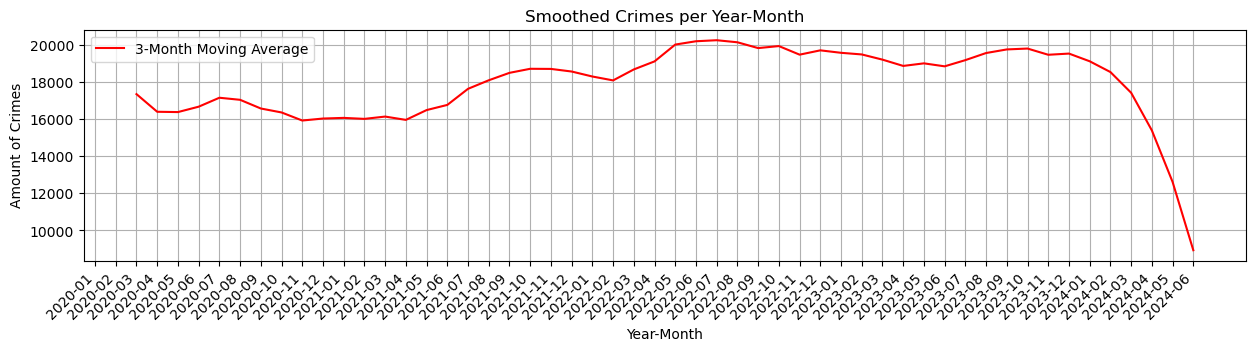

In [82]:
# Berechnung des gleitenden Durchschnitts (z.B. über 3 Monate)
df_crimes["MOVING_AVERAGE"] = df_crimes["CRIME COUNT"].rolling(window=3).mean()

plt.figure(figsize=(15, 3)) # Erstellt eine figure die 15 inches breit und 3 inches hoch ist
plt.grid(True) # Gitter für bessere Lesbarkeit
plt.xticks(rotation=45, ha='right')
plt.plot(df_crimes["YEAR-MONTH OCC"], df_crimes["MOVING_AVERAGE"], color="red", label="3-Month Moving Average")
plt.xlabel("Year-Month")
plt.ylabel("Amount of Crimes")
plt.title("Smoothed Crimes per Year-Month")
plt.legend()
plt.show()

Die vorliegenden Daten zeigen monatliche Kriminalitätszahlen von Januar 2020 bis Juni 2024, wobei jeder Eintrag die "Year-Month"-Kombination und die zugehörige Kriminalitätsanzahl (CRIME COUNT) enthält. Auffällig ist, dass die Kriminalitätszahlen im Laufe der Zeit zunächst schwanken, bis sie gegen Ende des betrachteten Zeitraums, insbesondere ab 2024, stark zurückgehen.

Der gleitenden Durchschnitts, hilft dabei kurzfristige Schwankungen zu glätten und den übergeordneten Trend besser sichtbar zu machen.

Der Anstieg der Kriminalitätsraten zwischen Februar und Oktober 2022 ist wahrscheinlich auf eine Kombination aus saisonalen Faktoren, der Wiederaufnahme des öffentlichen Lebens nach der Pandemie zurückzuführen. Ab 2022 wurden weltweit viele Beschränkungen aufgehoben, wodurch das öffentliche Leben wieder zunahm. Dies könnte zu einem „Nachholeffekt“ geführt haben, bei dem mehr soziale Interaktionen und Aktivitäten auch mit einer Zunahme von Straftaten einhergingen.

Der drastische Rückgang der Kriminalitätszahlen ab 2024 in Los Angeles könnte durch eine Kombination aus technologischen Fortschritten, wie Überwachungskameras, Predictive Policing (vorhersagende Polizeiarbeit) und Einsatz von Künstlicher Intelligenz zur Analyse von Kriminalitätsschwerpunkten und effektiveren Polizeimaßnahmen erklärt werden.

- Ein 3-monatiger gleitender Durchschnitt eignet sich gut, um sowohl langfristige Trends zu erkennen als auch auf saisonale Muster zu reagieren, ohne zu stark von einzelnen Monatsschwankungen beeinflusst zu werden.
- The decrease in crime rates in Los Angeles starting in January 2024 can be attributed to various efforts by local authorities. Key factors include targeted initiatives like the Organized Retail Theft Task Force, which significantly reduced crimes like flash robberies (by 33%)​ 
https://xtown.la/2024/01/16/los-angeles-sees-murders-decline-in-2023-but-property-crime-is-up/

# LA's Top 10

In [83]:
# .value_counts sortiert immer absteigender Anzahl
# Top 10 Verbrechen
df_crimes_desc = df["Crm Cd Desc"].value_counts()
df_top10_crimes = df_crimes_desc.head(10)

# Top 10 verwendete Waffen
df_weapons_desc = df["Weapon Desc"].value_counts()
df_top10_weapons = df_weapons_desc.head(10)

# Top 10 Crime Areas
df_area_desc = df["AREA NAME"].value_counts()
df_top10_crime_areas = df_area_desc.head(10)

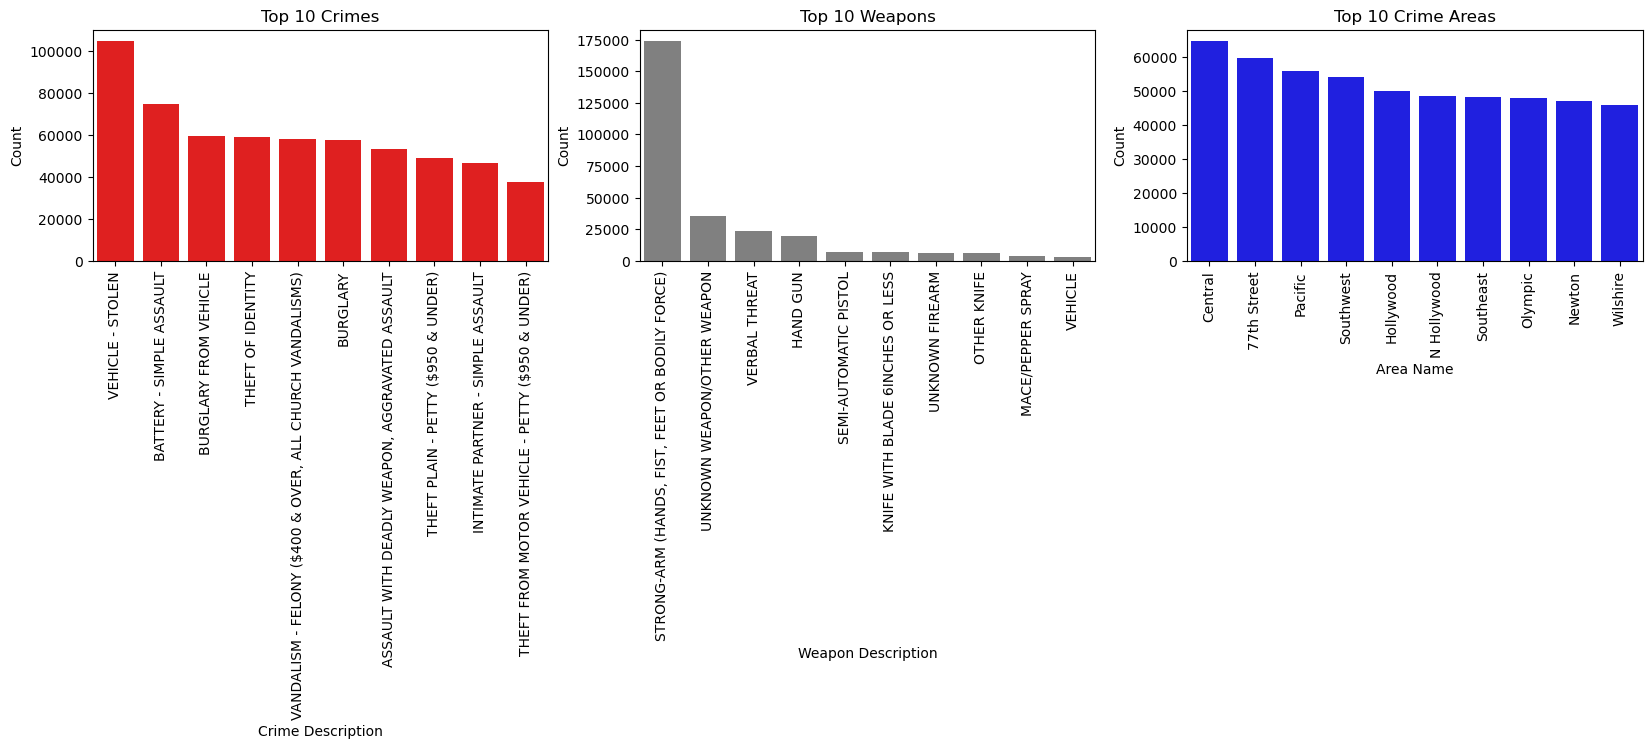

In [84]:
f, axs = plt.subplots(1, 3, figsize=(20, 3))

sns.barplot(x=df_top10_crimes.index, y=df_top10_crimes.values, ax=axs[0], color= "red")
axs[0].set_title("Top 10 Crimes")
axs[0].set_xlabel("Crime Description")
axs[0].set_ylabel("Count")
axs[0].tick_params(axis='x', rotation=90)

sns.barplot(x=df_top10_weapons.index, y=df_top10_weapons.values, ax=axs[1], color= "grey")
axs[1].set_title("Top 10 Weapons")
axs[1].set_xlabel("Weapon Description")
axs[1].set_ylabel("Count")
axs[1].tick_params(axis='x', rotation=90)

sns.barplot(x=df_top10_crime_areas.index, y=df_top10_crime_areas.values, ax=axs[2], color= "blue")
axs[2].set_title("Top 10 Crime Areas")
axs[2].set_xlabel("Area Name")
axs[2].set_ylabel("Count")
axs[2].tick_params(axis='x', rotation=90)

#f.tight_layout()

Die häufigste Straftat ist der Fahrzeugdiebstahl, gefolgt von einfachen Körperverletzungen und Einbrüchen in Fahrzeuge. In Los Angeles waren im Jahr 2023 insgesamt 7.496.930 Fahrzeuge registriert (https://www.laalmanac.com/transport/tr02.php). Bei einer Bevölkerungszahl von 3,821 Millionen entspricht dies etwa zwei Fahrzeugen pro Einwohner, was auf eine stark autoorientierte Gesellschaft hinweist. Dies könnte auch ein Grund dafür sein, warum eine hohe Anzahl von Straftaten in Zusammenhang mit Fahrzeugen steht. 

Die mit Abstand meist verwendete "Waffe" "Strong-Arm (Hands, Fist, Feet, or Bodily Force)" (insgesamt 174.057) beschreibt im kriminalistischen Kontext den Einsatz von physischen Körperteilen oder körperlicher Kraft, um eine Straftat zu begehen. Es handelt sich dabei nicht um den Einsatz von Waffen, sondern um reine körperliche Gewalt. Aus den Top-10 Crimes wurden mit hoher Wahrscheinlichkeit Straftaten wie "assault with deadly weapon, aggravated aussault" mit echten Waffen wie Schusswaffen oder Messern begangen. Das erklärt die Dominanz von "strong-arm" in diesem Diagramm.

Ein Blick auf die Top 10 Crime Areas zeigt, dass bestimmte Bezirke wie Central, 77th Street und Pacific als Kriminalitäts Hotspots gelten. Bezirk Central, welcher Downtown Los Angeles umfasst, ist durch hohe wirtschaftliche Aktivität, eine große Zahl an Touristen sowie eine hohe Obdachlosenquote geprägt. Diese Faktoren könnten zu einer höheren Zahl an Eigentumsdelikten wie Fahrzeugdiebstahl und Konflikten im öffentlichen Raum führen. In Bezirken wie 77th Street und Pacific könnten soziale und wirtschaftliche Herausforderungen wie Arbeitslosigkeit, eine hohe Bevölkerungsdichte und ein höherer Anteil einkommensschwacher Haushalte eine Rolle spielen.

In [85]:
hourly_crime_counts

HOUR OCC
1.0      4177
2.0      6959
3.0     27793
4.0     21076
5.0     18505
6.0     21768
7.0     24699
8.0     35270
9.0     34663
10.0    52912
11.0    44465
12.0    66971
13.0    49214
14.0    49736
15.0    52309
16.0    50374
17.0    55800
18.0    56901
19.0    52703
20.0    63618
21.0    50770
22.0    48745
23.0    45277
Name: count, dtype: int64

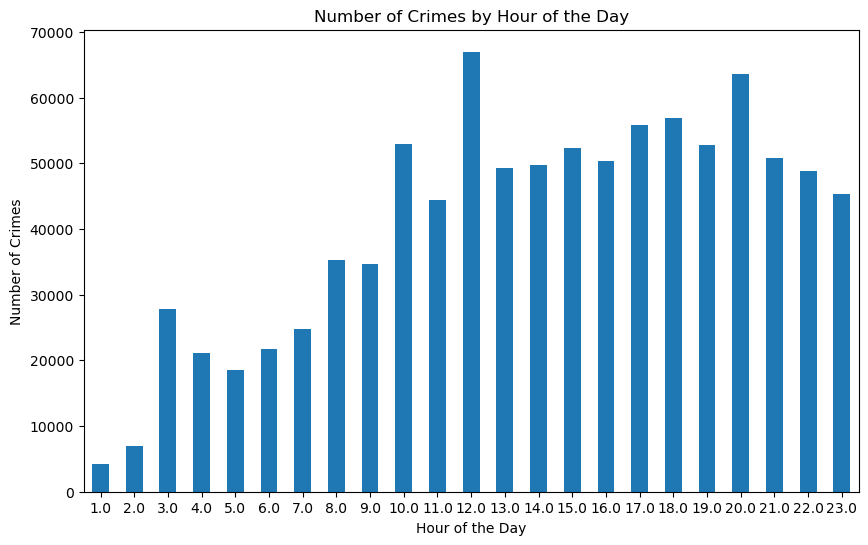

In [94]:
df_time_occ = df.copy()

# Konvertiert die Spalte "TIME OCC" in datetime Format (Stunde und Minute), ungültige Daten werden in NaT (Not a Time) umgewandelt
df_time_occ["TIME OCC"] = pd.to_datetime(df_time_occ["TIME OCC"], format="%H%M", errors="coerce")
# Extrahiere die Stunde aus der TIME OCC Spalte
df_time_occ["TIME OCC"] = df_time_occ["TIME OCC"].dt.hour
# Zählt die Vorkommen jeder Stunde und sortiert nach Stunde
df_crimes_per_hour = df_time_occ["TIME OCC"].value_counts().sort_index()
# Ausgabe als Barchart
plt.figure(figsize=(10, 6))
df_crimes_per_hour.plot(kind="bar")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes by Hour of the Day")
plt.xticks(rotation=0)
plt.show()

# Zu welcher Tageszeit finden die meißten Verbrechen statt

# Area Crime Rate

In [52]:
df_area_crime_counts = df.copy()
df_area_crime_counts = df_area_crime_counts.groupby("AREA NAME").size().reset_index(name="CRIME COUNT").sort_values(by="CRIME COUNT", ascending=False)

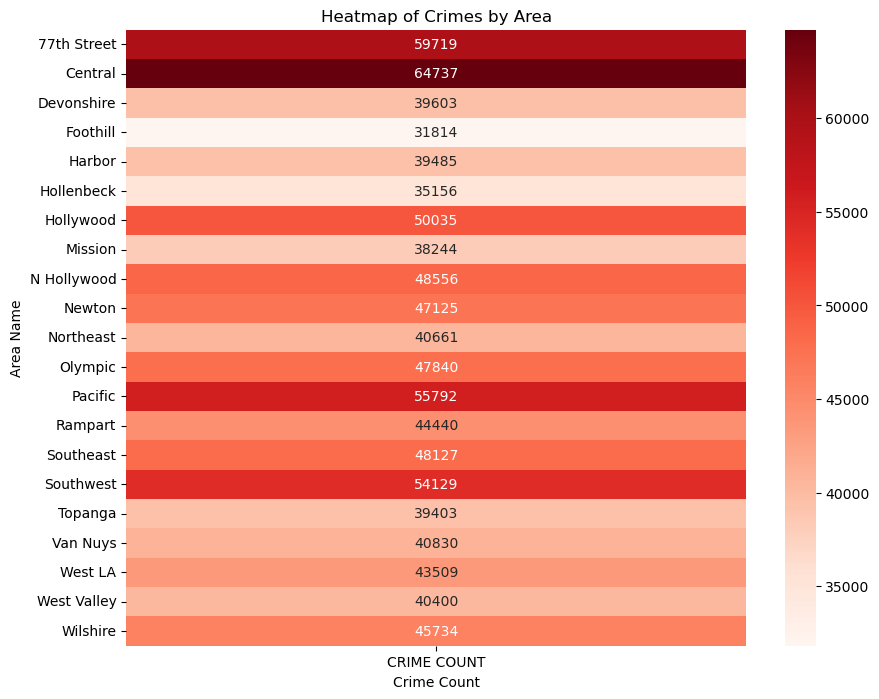

In [53]:
# Erstellen einer Pivot-Tabelle für das Heatmap-Diagramm
pivot_table = df_area_crime_counts.pivot_table(index="AREA NAME", values="CRIME COUNT")
# Erstellen einer neuen Abbildung mit den angegebenen Abmessungen
plt.figure(figsize=(10, 8))
# Zeichnen der Heatmap mit den Daten aus der Pivot-Tabelle
sns.heatmap(pivot_table, annot=True, cmap="Reds", fmt=".0f")
# Hinzufügen eines Titels zur Heatmap
plt.title("Heatmap of Crimes by Area")
# Beschriftung der x-Achse
plt.xlabel("Crime Count")
# Beschriftung der y-Achse
plt.ylabel("Area Name")
# Anzeigen der Heatmap
plt.show()

# Waffenverwendung (Weapon Desc)
- Diagramm: Kreisdiagramm
- Ziel: Veranschauliche die am häufigsten verwendeten Waffen.

In [54]:
df_filtered = df[df["Weapon Desc"] == "STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"].reset_index()
df_filtered[["Crm Cd Desc", "Weapon Desc"]]

,Crm Cd Desc,Weapon Desc
0,BATTERY - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
1,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
2,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
3,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
4,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
...,...,...
174052,BATTERY - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
174053,ROBBERY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
174054,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
174055,BATTERY - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"


In [55]:
df_most_used_weapons = df.copy()
df_most_used_weapons = df_most_used_weapons["Weapon Desc"].value_counts()
df_most_used_weapons.head(10)


Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174057
UNKNOWN WEAPON/OTHER WEAPON                        35496
VERBAL THREAT                                      23755
HAND GUN                                           20012
SEMI-AUTOMATIC PISTOL                               7222
KNIFE WITH BLADE 6INCHES OR LESS                    6812
UNKNOWN FIREARM                                     6543
OTHER KNIFE                                         5857
MACE/PEPPER SPRAY                                   3725
VEHICLE                                             3226
Name: count, dtype: int64

# Verbrechen nach Status (Status Desc)
- Diagramm: Balkendiagramm
- Ziel: Zeige die Aufklärungsrate (z. B. wie viele Fälle "Closed" oder "Investigation Continuing" sind).

In [56]:
df_status_desc = df.copy()
df_status_desc = df_status_desc["Status"].value_counts()
df_status_desc

Status
IC    762340
AO    104682
AA     83373
JA      3139
JO      1799
CC         5
Name: count, dtype: int64

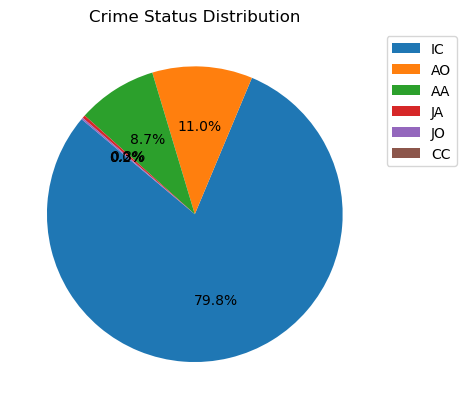

In [57]:

plt.pie(df_status_desc, labels=None, autopct='%1.1f%%', startangle=140)
plt.legend(df_status_desc.index, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Crime Status Distribution")
plt.show()


In [58]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


# Geografische Analyse (LAT, LON)
- Diagramm: Punktkarte (z. B. mit Folium oder Matplotlib)
- Ziel: Zeige, wo die Verbrechen geografisch konzentriert sind.

# Verbrechen nach Tageszeit (TIME OCC)
# Zu welchen Tageszeiten finden die meisten Verbrechen statt
- Diagramm: Histogramm
- Ziel: Analysiere, wann Verbrechen am häufigsten passieren (z. B. nachts oder tagsüber).